### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
data=pd.read_csv("E:\\Data\\csv_result_3year.csv")
data.head()

,id,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,1,0.174190,0.41299,0.14371,1.348,-28.982,0.60383,0.219460,1.1225,1.1961,...,0.16396,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,0
1,2,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.19,3.5716,5.95,0
2,3,0.000595,0.22612,0.48839,3.1599,84.874,0.19114,0.004572,2.9881,1.0077,...,0.0076387,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,0
3,4,0.024526,0.43236,0.27546,1.7833,-10.105,0.56944,0.024526,1.3057,1.0509,...,0.048398,0.043445,0.9516,0.142980,4.2286,5.0528,98.783,3.695,3.4844,0
4,5,0.188290,0.41504,0.34231,1.9279,-58.274,0.00000,0.233580,1.4094,1.3393,...,0.17648,0.321880,0.82635,0.073039,2.5912,7.0756,100.54,3.6303,4.6375,0


### Shape of the dataset

In [3]:
print('There are {} records with {} features'.format(data.shape[0],data.shape[1]))

There are 10503 records with 66 features


### Checking whethere there is any missing values

In [4]:
data.isnull().sum().sort_values(ascending=False)

id        0
Attr49    0
Attr35    0
Attr36    0
Attr37    0
         ..
Attr27    0
Attr28    0
Attr29    0
Attr30    0
class     0
Length: 66, dtype: int64

### Checking the datatype of the features

In [5]:
data.dtypes

id          int64
Attr1     float64
Attr2     float64
Attr3     float64
Attr4      object
           ...   
Attr61     object
Attr62     object
Attr63     object
Attr64     object
class       int64
Length: 66, dtype: object

In [6]:
#list of categorical features


In [13]:
categorical_feat=[]
for i in data:
    if data[i].dtypes == 'object':
        categorical_feat.append(i)

In [14]:
cate_feat

['Attr4',
 'Attr5',
 'Attr8',
 'Attr9',
 'Attr12',
 'Attr13',
 'Attr15',
 'Attr16',
 'Attr17',
 'Attr19',
 'Attr20',
 'Attr21',
 'Attr23',
 'Attr24',
 'Attr26',
 'Attr27',
 'Attr28',
 'Attr30',
 'Attr31',
 'Attr32',
 'Attr33',
 'Attr34',
 'Attr37',
 'Attr39',
 'Attr40',
 'Attr41',
 'Attr42',
 'Attr43',
 'Attr44',
 'Attr45',
 'Attr46',
 'Attr47',
 'Attr49',
 'Attr50',
 'Attr52',
 'Attr53',
 'Attr54',
 'Attr56',
 'Attr58',
 'Attr60',
 'Attr61',
 'Attr62',
 'Attr63',
 'Attr64']

### After doing some study on the data, it has been observed that in some of the records there are "?" in the above cateforical features.


### So will be replacing '?' with Null values

In [15]:
data.replace('?',np.NaN,inplace=True)

In [16]:
#checing the null values again
data.isnull().sum().sort_values(ascending=False)

Attr37    4736
Attr21     807
Attr27     715
Attr60     592
Attr45     591
          ... 
Attr29       0
Attr1        0
Attr35       0
Attr36       0
class        0
Length: 66, dtype: int64

In [17]:
# number of features which have null values
nan_feat=[i for i in data.columns if data[i].isnull().any()]
print('Out of 66 features, {} features have missing values'.format(len(nan_feat)))

Out of 66 features, 44 features have missing values


### Converting all the categorical features into numerical 

In [18]:
data.loc[:,categorical_feat]=data.loc[:,categorical_feat].astype('float')


### Checking for outliers

In [19]:
c=0
for i in data.iloc[:,1:-1]:
    iqr = data[i].quantile(0.75)-data[i].quantile(0.25)
    lower_range = data[i].quantile(0.25)-(iqr*1.5)
    upper_range = data[i].quantile(0.75)+(iqr*1.5)
    print('Feature name : ',i)
    out=data.loc[data.loc[:,i] < lower_range,i].count() + data.loc[data.loc[:,i]> upper_range,i].count()
    if out > 0:
      c+=1
    print(' % of Outliers in {v}--->{x}'.format(v=i,x=out/len(data)*100))

Feature name :  Attr1
 % of Outliers in Attr1--->12.053698943159096
Feature name :  Attr2
 % of Outliers in Attr2--->2.7611158716557176
Feature name :  Attr3
 % of Outliers in Attr3--->2.580215176616205
Feature name :  Attr4
 % of Outliers in Attr4--->10.59697229363039
Feature name :  Attr5
 % of Outliers in Attr5--->14.87194135009045
Feature name :  Attr6
 % of Outliers in Attr6--->30.181852803960773
Feature name :  Attr7
 % of Outliers in Attr7--->10.844520613158146
Feature name :  Attr8
 % of Outliers in Attr8--->10.911168237646386
Feature name :  Attr9
 % of Outliers in Attr9--->6.912310768351899
Feature name :  Attr10
 % of Outliers in Attr10--->2.903932209844806
Feature name :  Attr11
 % of Outliers in Attr11--->9.635342283157193
Feature name :  Attr12
 % of Outliers in Attr12--->14.433971246310579
Feature name :  Attr13
 % of Outliers in Attr13--->10.473198133866514
Feature name :  Attr14
 % of Outliers in Attr14--->10.844520613158146
Feature name :  Attr15
 % of Outliers in Att

In [20]:
print('There are outliers in',c,'features out of',data.shape[1]-1, "independent features.")

There are outliers in 64 features out of 65 independent features.


### Outliers treatment 

### Now we replacing outliers with the extreme values 

In [21]:
# outlier treatment
for i in data.iloc[:,1:-1]:
  iqr = data[i].quantile(0.75)-data[i].quantile(0.25)
  lower_range = data[i].quantile(0.25)-(iqr*1.5)
  upper_range = data[i].quantile(0.75)+(iqr*1.5)
  data.loc[data[i]>=upper_range,i]=upper_range
  data.loc[data[i]<=lower_range,i]=lower_range

### After treatment again checking the outliers 

In [22]:
c1=0
for i in data.iloc[:,1:-1]:
    iqr = data[i].quantile(0.75)-data[i].quantile(0.25)
    lower_range = data[i].quantile(0.25)-(iqr*1.5)
    upper_range = data[i].quantile(0.75)+(iqr*1.5)
    print('Feature name : ',i)
    out=data.loc[data.loc[:,i] < lower_range,i].count() + data.loc[data.loc[:,i]> upper_range,i].count()
    if out > 0:
      c1+=1
    print(' % of Outliers in {v}--->{x}'.format(v=i,x=out/len(data)*100))

Feature name :  Attr1
 % of Outliers in Attr1--->0.0
Feature name :  Attr2
 % of Outliers in Attr2--->0.0
Feature name :  Attr3
 % of Outliers in Attr3--->0.0
Feature name :  Attr4
 % of Outliers in Attr4--->0.0
Feature name :  Attr5
 % of Outliers in Attr5--->0.0
Feature name :  Attr6
 % of Outliers in Attr6--->0.0
Feature name :  Attr7
 % of Outliers in Attr7--->0.0
Feature name :  Attr8
 % of Outliers in Attr8--->0.0
Feature name :  Attr9
 % of Outliers in Attr9--->0.0
Feature name :  Attr10
 % of Outliers in Attr10--->0.0
Feature name :  Attr11
 % of Outliers in Attr11--->0.0
Feature name :  Attr12
 % of Outliers in Attr12--->0.0
Feature name :  Attr13
 % of Outliers in Attr13--->0.0
Feature name :  Attr14
 % of Outliers in Attr14--->0.0
Feature name :  Attr15
 % of Outliers in Attr15--->0.0
Feature name :  Attr16
 % of Outliers in Attr16--->0.0
Feature name :  Attr17
 % of Outliers in Attr17--->0.0
Feature name :  Attr18
 % of Outliers in Attr18--->0.0
Feature name :  Attr19
 % of

In [23]:
print('There are outliers in',c1,'features out of',data.shape[1]-1, "independent features.")

There are outliers in 0 features out of 65 independent features.


### Missing value treatment

#### Replacing the missing values with mean values of that features

In [24]:
data.fillna(data.mean(),inplace=True)

In [25]:
data.isnull().sum().sort_values(ascending=False)

id        0
Attr49    0
Attr35    0
Attr36    0
Attr37    0
         ..
Attr27    0
Attr28    0
Attr29    0
Attr30    0
class     0
Length: 66, dtype: int64

In [26]:
data1=data.copy()

# For both PCA and Factor analysis, data should be standardize

### standardizing the data 

In [27]:
from sklearn.preprocessing import StandardScaler
stan_sca =  StandardScaler()
data_new = stan_sca.fit_transform(data.iloc[:,:-1])
data_new = pd.DataFrame(data=data_new,columns=data.iloc[:,:-1].columns)

In [28]:
data_1=pd.concat([data_new,data['class']],axis=1)

In [29]:
data_1.head()

,id,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,-1.731886,0.974114,-0.270470,-0.201416,-0.535034,-0.292674,1.727951,1.123344,-0.399860,-0.430442,...,0.782863,0.911875,-0.845174,-0.593332,-0.436740,-0.374138,-0.064256,-0.476039,-0.439327,0
1,-1.731556,0.745216,-0.115641,0.238152,-0.367583,-0.002805,-0.269833,0.774843,-0.376385,0.018942,...,-0.328611,0.513410,-0.295154,-0.593360,-0.719078,-0.786688,0.219190,-0.632084,-0.157401,0
2,-1.731226,-0.447553,-0.880996,0.891813,0.543163,0.752489,1.727951,-0.449618,0.483097,-0.639128,...,-0.490532,-0.514212,0.476770,-0.593360,-0.659524,-0.847135,-0.372185,-0.208992,-0.376935,0
3,-1.730896,-0.251570,-0.207186,0.216458,-0.276002,-0.119389,1.727951,-0.303555,-0.313154,-0.591276,...,-0.158506,-0.352285,0.132077,0.015944,-0.852401,-0.607587,0.165237,-0.606704,-0.520216,0
4,-1.730567,1.089587,-0.263772,0.428488,-0.189956,-0.561566,-0.269833,1.226701,-0.264075,-0.271823,...,0.884851,0.706974,-0.927119,-0.282107,-0.976465,-0.223199,0.193060,-0.620011,-0.350536,0


### Droping irrelvant features 

In [30]:
data_1.drop('id',inplace=True,axis=1)

In [31]:
data_1.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.974114,-0.270470,-0.201416,-0.535034,-0.292674,1.727951,1.123344,-0.399860,-0.430442,-0.081455,...,0.782863,0.911875,-0.845174,-0.593332,-0.436740,-0.374138,-0.064256,-0.476039,-0.439327,0
1,0.745216,-0.115641,0.238152,-0.367583,-0.002805,-0.269833,0.774843,-0.376385,0.018942,0.167789,...,-0.328611,0.513410,-0.295154,-0.593360,-0.719078,-0.786688,0.219190,-0.632084,-0.157401,0
2,-0.447553,-0.880996,0.891813,0.543163,0.752489,1.727951,-0.449618,0.483097,-0.639128,0.613760,...,-0.490532,-0.514212,0.476770,-0.593360,-0.659524,-0.847135,-0.372185,-0.208992,-0.376935,0
3,-0.251570,-0.207186,0.216458,-0.276002,-0.119389,1.727951,-0.303555,-0.313154,-0.591276,0.249450,...,-0.158506,-0.352285,0.132077,0.015944,-0.852401,-0.607587,0.165237,-0.606704,-0.520216,0
4,1.089587,-0.263772,0.428488,-0.189956,-0.561566,-0.269833,1.226701,-0.264075,-0.271823,0.316424,...,0.884851,0.706974,-0.927119,-0.282107,-0.976465,-0.223199,0.193060,-0.620011,-0.350536,0


# Factor Analysis 

In [32]:
#!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer

#### Before applying factor analysis we have to whether the correlation is present in the data

### Bartlett’s test
### Ho: There is no correlation present among the features
### H1: There is correlation present among the features

In [33]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data_1)

print("p value : ",p_value)

p value :  0.0


#### Here p value is less than 0.05, then we reject the null hypothesis and conclude that correlation is present among the features 

### Choosing the optimum number of Factors

In [34]:
fa = FactorAnalyzer()
fa.fit(data_1)
eigen_values, vectors = fa.get_eigenvalues()

In [35]:
eigen_values[:10]

array([23.34663178,  9.45186527,  6.0781783 ,  3.66900358,  2.29205363,
        2.14051184,  1.85044999,  1.41786144,  1.26761833,  1.11699229])

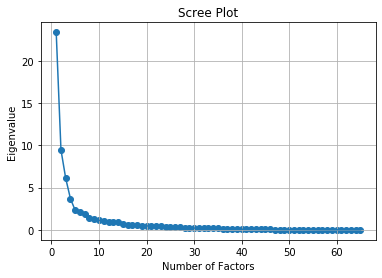

In [36]:
plt.scatter(range(1,data_1.shape[1]+1),eigen_values)
plt.plot(range(1,data_1.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Number of Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [37]:
#electing the number of factors whose eigenvalues are greater than 1
number_of_optimum_factors=0
for i in eigen_values:
    if i >=1:                  
        number_of_optimum_factors+=1
        
print('Optimum number of factors =',number_of_optimum_factors)        

Optimum number of factors = 10


# Optimum number of factors = 10

### Interpreting the factors

### Loadings 
##### It indicate how much a factor explains a features, it lie in between -1 to 1

In [39]:
f_a = FactorAnalyzer(n_factors=number_of_optimum_factors,rotation='varimax')
f_a.fit(data_1)
print(pd.DataFrame(f_a.loadings_,index=data_1.columns))

               0         1         2         3         4         5         6  \
Attr1   0.943038  0.131592  0.152686 -0.068646 -0.060863  0.055942 -0.034396   
Attr2  -0.204388 -0.821417 -0.030916  0.030720 -0.041107 -0.231762 -0.144460   
Attr3   0.205213  0.746771  0.524815  0.103330  0.148872  0.079121 -0.028249   
Attr4   0.153901  0.898391  0.147977  0.102602  0.146449 -0.066600  0.049740   
Attr5   0.178793  0.632772  0.221672  0.121225 -0.181676  0.091906  0.006220   
...          ...       ...       ...       ...       ...       ...       ...   
Attr61  0.013290  0.029204 -0.110515 -0.786318 -0.000819 -0.117965 -0.018195   
Attr62 -0.232874 -0.677793 -0.248053  0.467331  0.222938 -0.173835  0.113262   
Attr63  0.219558  0.742214  0.135072 -0.392013 -0.155296 -0.101733 -0.037988   
Attr64  0.094132 -0.097088  0.791776 -0.157100 -0.103978 -0.170625  0.218122   
class  -0.106785 -0.094323 -0.012205 -0.007956  0.019363 -0.072964  0.014788   

               7         8         9  


### Variance 

###### From this we can find out  amount of variance explained by each factor.

In [40]:
print(pd.DataFrame(f_a.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                          0          1         2         3         4  \
Variance          17.314210  13.564675  4.133938  3.906470  3.584876   
Proportional Var   0.266372   0.208687  0.063599  0.060100  0.055152   
Cumulative Var     0.266372   0.475060  0.538659  0.598758  0.653910   

                         5         6         7         8         9  
Variance          2.110132  1.537800  1.504269  1.380346  1.112749  
Proportional Var  0.032464  0.023658  0.023143  0.021236  0.017119  
Cumulative Var    0.686374  0.710032  0.733175  0.754411  0.771530  


### From this we can interpret that 10 factors can explain 77.15% of variance 

### COMMUNALITIES 

##### From communalities we can find out each features’s variance that has been explaind by the factors

In [41]:
print(pd.DataFrame(f_a.get_communalities(),index=data_1.columns,columns=['Communalities']))

        Communalities
Attr1        0.963009
Attr2        0.958009
Attr3        0.916670
Attr4        0.944726
Attr5        0.564932
...               ...
Attr61       0.649710
Attr62       0.901791
Attr63       0.846346
Attr64       0.793842
class        0.028655

[65 rows x 1 columns]


### The proportion of each features’s variance that is explained by the factors can be inferred from the above. For example, we could consider the features ‘Attr1’ about 96.3% of its variance is explained by all the factors together.

# PCA 

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca=PCA(n_components=30)

In [44]:
pca.fit(data_1.iloc[:,:-1])

PCA(n_components=30)

In [45]:
prin_com=pca.transform(data_1.iloc[:,:-1])

In [46]:
prin_com

array([[ 3.35540002e+00, -3.93224691e+00, -1.18789760e+00, ...,
         2.41278088e-02, -4.68734409e-02,  2.07079447e-01],
       [ 1.39907424e+00, -2.38584886e+00, -8.39264078e-01, ...,
        -2.94871534e-01,  8.42276810e-02,  5.88590803e-01],
       [ 3.08202480e-01,  2.96046061e+00, -2.35939636e+00, ...,
        -3.14468059e-01, -1.86164015e-03,  8.86399559e-02],
       ...,
       [-8.45953734e+00, -2.33414357e-01, -2.65818549e-01, ...,
        -2.29595642e-01, -1.13927458e+00, -1.05124473e-01],
       [-2.29878785e+00,  1.02102714e-01, -1.04788623e+00, ...,
         5.11764076e-02, -2.08650168e-01, -2.76093290e-01],
       [-4.18798871e+00, -2.71466332e+00,  6.07481481e-01, ...,
         3.04853504e-01, -1.49524199e-01, -4.14703902e-01]])

In [47]:
pca.explained_variance_ratio_

array([0.36443354, 0.14768539, 0.0949438 , 0.05730552, 0.03581323,
       0.03339724, 0.02890655, 0.02213939, 0.01977304, 0.01734953,
       0.01543905, 0.01495011, 0.01436095, 0.01150557, 0.00962092,
       0.00884991, 0.00809779, 0.00734361, 0.00715045, 0.00695687,
       0.00661715, 0.0061905 , 0.00541497, 0.00516773, 0.00499666,
       0.00434662, 0.00413475, 0.00385922, 0.0032065 , 0.00311648])

### Bar plot representing the variance explained by each components

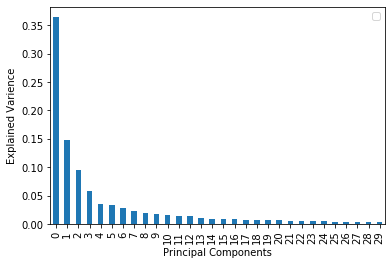

In [48]:
import matplotlib.pyplot as plt
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience')
plt.show()

In [49]:
from numpy import cumsum
Explained_variance = list(cumsum(pca.explained_variance_ratio_)*100)

In [52]:
num_of_com =[i for i in range(1,31)]

In [53]:
a1=pd.DataFrame(num_of_com,columns=['Number of princial components'])
a2=pd.DataFrame(Explained_variance,columns=['% of Explained variance'])

In [54]:
explained_var_df=pd.concat([a1,a2],axis=1)
explained_var_df

,Number of princial components,% of Explained variance
0,1,36.443354
1,2,51.211893
2,3,60.706274
3,4,66.436826
4,5,70.018149
5,6,73.357873
6,7,76.248528
7,8,78.462467
8,9,80.439771
9,10,82.174724


### Cumulative  Explained Varience using line plot

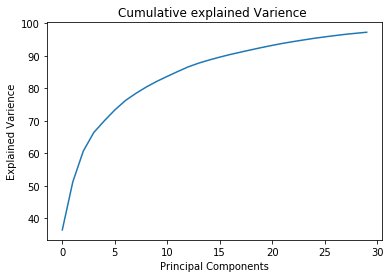

In [55]:
plt.plot(Explained_variance, linestyle = '-')
plt.title('Cumulative explained Varience ')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience')
plt.show()

## From the 10 principal components  around 82.17% of variance has been explained, from 15 principal components around 88.76% of variance has been explained, from 20 principal components around 92.60% of variance has been explained, from 25 principal components around 95.44% of variance has been explained and from 30 principal components around 97.30% of variance has been explained